# Python Statelevel fitVirusXX
## Version 9.X
## Date: 01.11.2021
## Author: Azmyin Md. Kamal
## For the Association Mining Paper
## Manually mark the phase value for each week. Doesn't matter which wave

# Load Preambles

In [1]:
# Load all modules, function definitions and important variable definitions
from funcsXX import *

df = pd.read_csv("Cases_All.csv", header = 0)
#df.head(10)

In [2]:
# Load in names of states
#df2 = pd.read_csv("state_name.csv",header = 0)

# state_names= ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']

# state_names = ['Colorado', 'Illinois', 'Indiana', 'Kansas','Louisiana','Maryland', 'Virginia']

state_names = ['Wyoming']
#type(state_names[0]) # Debug

In [3]:
# Keep week array in memory
week_array_file = df['week'].values
print(week_array_file)
#print(np.shape(week_array_file))
const_add = week_array_file[0] - 1
print(const_add)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
0


# Main Loop

In [4]:
# Create a new dataframe and save week numbers
df_master = pd.DataFrame()
df_master['Week'] = week_array_file
df_master.head(10)

,Week
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [5]:
df_master_2 = pd.DataFrame()
df_master_2['Phase Loc'] = ['w1_tp2','w1_tpeak','w1_tp3','w1_tp4','w1_tpend','w2_tp2','w2_tpeak','w2_tp3','w2_tp4','w2_tpend']
df_master_2.head(10)

,Phase Loc
0,w1_tp2
1,w1_tpeak
2,w1_tp3
3,w1_tp4
4,w1_tpend
5,w2_tp2
6,w2_tpeak
7,w2_tp3
8,w2_tp4
9,w2_tpend


Wave 1 ends in week --> 21

-------------------End of state calculation -----------------------


Start loc wave --> 1
tp2 --> 10
tpeak --> 14
tp3 --> 18
tp4 --> 21
tpend --> 0


Start loc wave --> 22
tp2 --> 28
tpeak --> 44
tp3 --> 0
tp4 --> 0
tpend --> 0



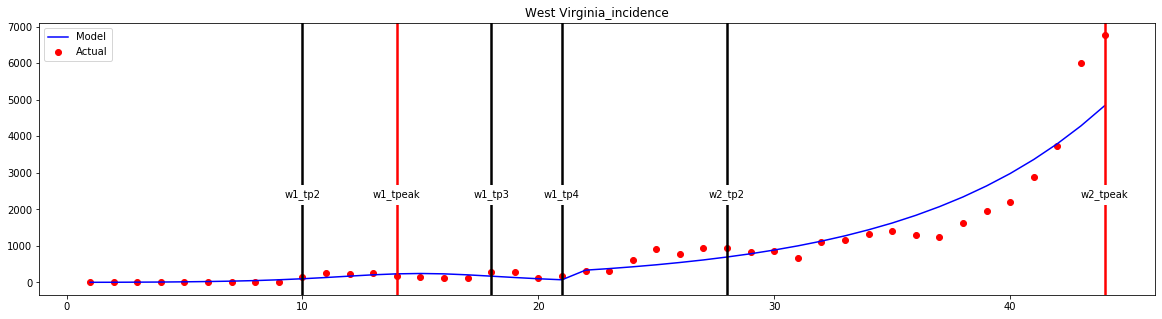

In [10]:
# Original algorithm

##master_fn(df, week_array_file, state_name, debug, plot_res, size_fig, scale_term)
# find phase loc outputs in my scale
tol_wave = 0.97
I_pred = []
I_act = []

man_idx = 21 # Where we think wave 1 ended

for state_now in state_names:
    y_act, y_pred, I_act, I_pred, bb_fit1, bb_fit2, t_w1, t_w2, t_cumu = master_fn(manual_end = man_idx,df = df,week_array_file = week_array_file,state_name = state_now, debug = False, plot_res = True, size_fig=(20,5), scale_term = const_add, chk_method = 'nelder')

    plot_res = True
    state_nn = state_now

    if (plot_res == True):
        pname = state_nn + "_incidence"
        plot_fit(pname,t_cumu,I_act,I_pred, (20,5))

    # print(f"I_pred before moving average -- {I_pred}\n")
    # print(len(I_pred))

    # Needed for scaling
    max_t_span_1 = max(t_w1)
    max_t_span_2 = max(t_w2)

    w1_loc = []
    w1_loc = find_phase_loc(2, bb_fit1[0], bb_fit1[1], bb_fit1[2], t_w1,True)
    w1_loc = scale_to_dat_week(w1_loc, const_add, max_t_span_1)
    
    w2_loc = []
    w2_start = t_w2[0]

    numxx = 2 # Default (2/r) DON'T CHANGE THIS
    force_peak = 0 # In my scale

    w2_loc = find_phase_loc_2(w2_start, force_peak, numxx, bb_fit2[0], bb_fit2[1], bb_fit2[2],t_w2,True)
    w2_loc = scale_to_dat_week(w2_loc, const_add, max_t_span_2)
    
    # Plot with normal values
    max_y_act = max(I_pred)
    plot_phase_lines(w1_loc, w2_loc, max_y_act)
    fname = state_now + '_manual_tweak' + '.png'
    plt.savefig(fname)

    #Load incidence to dataframe
    df_master[state_now] = I_pred

    # # Load phases to dataframe
    w_loc_combined = np.concatenate((w1_loc, w2_loc))
    df_master_2[state_now] = w_loc_combined

In [7]:
#print(df_master_2.head(10))

In [8]:
#print(df_master.head())

In [9]:
#df_master.to_csv("output_incidence.csv")
#df_master_2.to_csv("output_phase.csv")
# df_master_2.to_csv("incidence_logistic_model_states.csv")